<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2022S2/blob/main/Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Exercício 1

Fazer um modelo de Regressão Linear para estimar `petal_length` a partir dos demais valores numéricos. Obter o R2 do modelo.

3.7580000000000005

Score:

0.97


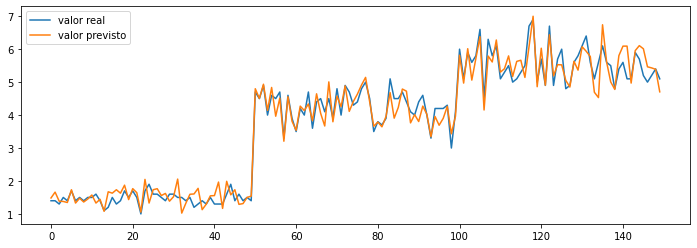

In [13]:
from sklearn import linear_model
# Entradas e Saídas
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Definição
reg = linear_model.LinearRegression()

# Treinamento
reg.fit(X,y)

# Avaliação
y_pred = reg.predict(X)

print( y_pred.mean() )
# print( y_pred )

score = reg.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

fig = plt.figure(figsize=(12,4))

plt.plot(df['petal_length'],label='valor real')
plt.plot(y_pred,label='valor previsto')

plt.legend()
plt.show()



Isso não foi pedido aqui. Mas se quiser empregar a variável categórica `species` como variável preditora do comprimento na regressão, você pode fazer o hot encode do atributo, tornando-o numérico.

In [14]:
df = sns.load_dataset('iris')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['species']])
transformed = hot_encode.transform(df[['species']]).toarray()

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())

df = pd.concat([df, transformed_df],axis=1)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0


In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_setosa', 'species_versicolor', 'species_virginica'],
      dtype='object')

3.7580000000000005

Score:

0.98


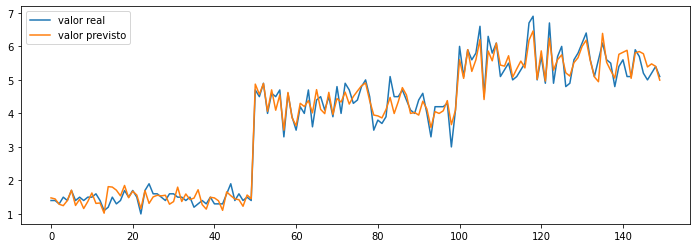

In [16]:
from sklearn import linear_model
# Entradas e Saídas
X = df[['sepal_length', 'sepal_width', 'petal_width', 'species_setosa', 'species_versicolor', 'species_virginica']]
y = df['petal_length']

# Definição
reg = linear_model.LinearRegression()

# Treinamento
reg.fit(X,y)

# Avaliação
y_pred = reg.predict(X)

print( y_pred.mean() )
# print( y_pred )

score = reg.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

fig = plt.figure(figsize=(12,4))

plt.plot(df['petal_length'],label='valor real')
plt.plot(y_pred,label='valor previsto')

plt.legend()
plt.show()



# Exercício 2

Fazer um modelo de Regressão Logística para classificação das `species`. Obter a acuracidade do modelo.

In [17]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Entradas e Saídas
X = df[['sepal_length', 'sepal_width', 'petal_width','petal_length']]
y = df['species']

# Definição
# clf = LogisticRegression(max_iter=1000)
# clf = KNeighborsClassifier(5)
clf = svm.SVC()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))

score = clf.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

print( y_pred )






0.9733333333333334

Score:

0.97
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor

# Modelos

---

## Dados

In [19]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv', index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Regressão Linear

$$Price = a_0 + a_1 MPG.city + a_2 MPG.highway + a_3 EngineSize + a_4 Horsepower + a_5 RPM $$

In [20]:
from sklearn import linear_model
# Entradas e Saídas
X = df[['MPG.city', 'MPG.highway', 
       'EngineSize', 'Horsepower', 'RPM']]
y = df['Price']

# Definição
reg = linear_model.LinearRegression()

# Treinamento
reg.fit(X,y)

# Avaliação
y_pred = reg.predict(X)

y_pred


array([18.75855548, 27.80680613, 23.87889942, 23.93303586, 27.86148748,
       14.76141032, 23.25934122, 25.30831633, 23.43661024, 27.7226036 ,
       40.47743379, 13.7126559 , 14.06719394, 21.82670009, 15.1700848 ,
       24.19982276, 24.05019086, 23.73800274, 40.89749719, 21.13552026,
       19.26804267, 20.53204028, 11.90664299, 12.74472314, 14.10570885,
       20.96084889, 14.15984529, 40.84819201, 11.90664299, 29.12600339,
        7.67983829, 17.46989597, 13.32110145, 14.26681654, 15.5414435 ,
       21.54954764, 18.81651652, 26.14251537,  3.04835049, 10.85288104,
       21.26368981, 10.13033833, 18.62258416, 10.31310268, 17.12459676,
       11.71593112, 18.13754553, 38.77346865, 25.91855351, 31.49262684,
       22.29479454, 28.84091752,  9.55659977, 12.69431012, 21.0955912 ,
       22.02726332, 34.84612998, 17.74809211, 29.91344545, 14.41234478,
       19.409963  , 11.90664299, 28.39195533, 14.21538321, 20.11261776,
       21.67209444, 22.22399476, 20.70632404, 14.70727388, 24.19

In [21]:
y_pred.mean()

19.509677419354837

In [22]:
df.Price.mean()

19.50967741935484

## Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression

# Entradas e Saídas
X = df[['Price', 
       'MPG.city', 'MPG.highway', 
       'EngineSize', 'Horsepower', 'RPM']]
y = df['DriveTrain']

# Definição
clf = LogisticRegression(max_iter=5000)

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))

score = clf.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

0.7634408602150538

Score:

0.76


In [27]:
y_pred == y

1      True
2      True
3      True
4      True
5     False
      ...  
89     True
90     True
91     True
92    False
93     True
Name: DriveTrain, Length: 93, dtype: bool